# California Housing Price Prediction

This algorithm will predict the price of a house in California based on given factors.

**Step 1: Setting up the work environment**

We are going to download the necessary packages for our work. We are going to view the dataset and check the datatypes.

In [111]:
#installing packages
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import os
from collections import Counter
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind
%matplotlib inline
from scipy import stats
from sklearn.metrics import classification_report
from datetime import datetime
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing as preproc
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#getting the dataset
calihouse= pd.read_excel('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Python\Datasets_Py\\Regression\\california_housing.xlsx') 
calihouse.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
#seeing the dataset
calihouse.shape

(20640, 10)

In [4]:
#seeing datatypes
calihouse.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

**Step 2: Data cleaning**

In this step, we are going to clean our dataset. We are going to look for null values and replace them with mean and mode. 
We are going to modify some variables if it is necessary and change datatypes for better analysis. We will also remove outliers from the dataset.  Outliers hamper the machine learning algorithms and hence they have to be removed.

In [5]:
#categorical variables
cat= ['ocean_proximity']

In [6]:
#getting non categorical variables
non_cat=[]
for x in calihouse.columns:
    if x in cat:
        pass
    else:
        non_cat.append(x)
print(non_cat)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [7]:
#seeing missing values
calihouse.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
#replacing missing values with nan(Not a number) that makes things simpler for python
calihouse.replace("?",np.nan,inplace = True)
print(calihouse.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [9]:
#replacing missing values in the variable total_bedrooms
med_br=calihouse.total_bedrooms.median()
med_br
#replacing blank with mean
calihouse['total_bedrooms'].replace(np.nan, med_br, inplace=True)

<AxesSubplot: >

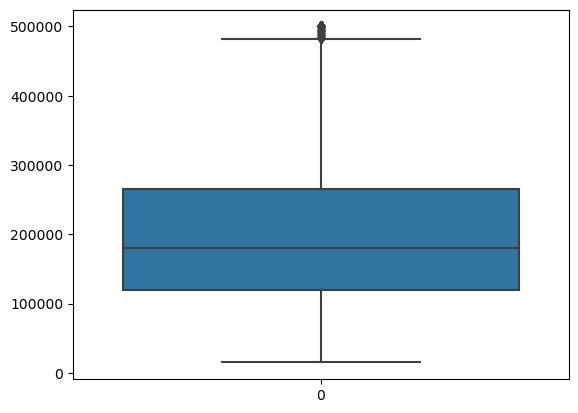

In [10]:
#seeing the outliers for median_house_value
sb.boxplot(calihouse['median_house_value'])

<AxesSubplot: >

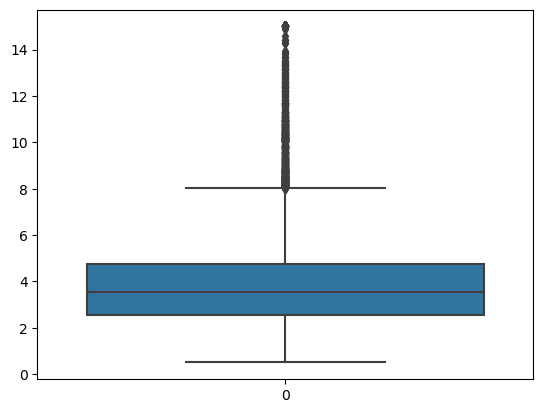

In [11]:
#seeing the outliers for median_income
sb.boxplot(calihouse['median_income'])

In [12]:
#outlier treatment for variable median_income
calihouse.median_income.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])


0.10     1.903800
0.25     2.563400
0.50     3.534800
0.70     4.437500
0.90     6.159210
0.95     7.300305
0.99    10.596540
Name: median_income, dtype: float64

In [13]:
#seeing limits
median_income_HE=calihouse[calihouse.median_income > 8].copy()
median_income_HE

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
131,-122.19,37.84,18,1617,210.0,533,194,11.6017,NEAR BAY,392600
134,-122.19,37.83,28,1326,184.0,463,190,8.2049,NEAR BAY,335200
135,-122.20,37.83,26,1589,223.0,542,211,8.4010,NEAR BAY,351200
...,...,...,...,...,...,...,...,...,...,...
20426,-118.69,34.18,11,1177,138.0,415,119,10.0472,<1H OCEAN,500001
20427,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,<1H OCEAN,500001
20428,-118.83,34.23,6,8803,1114.0,3385,1010,8.7288,<1H OCEAN,425800
20436,-118.69,34.21,10,3663,409.0,1179,371,12.5420,<1H OCEAN,500001


In [14]:
#putting them at one place
print(len(median_income_HE))

690


In [15]:
#removing outliers
for x in calihouse.median_income:
    if x > 8:
        calihouse.median_income.replace(x,np.nan,inplace=True)

<AxesSubplot: >

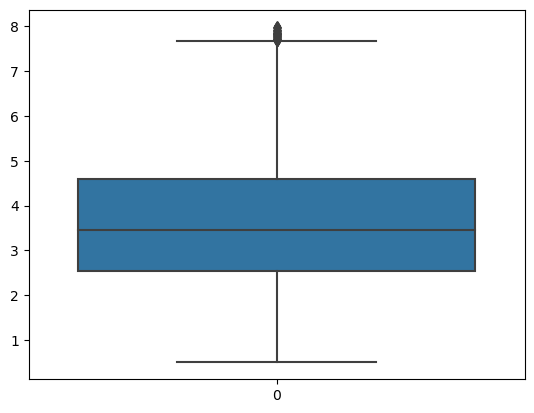

In [16]:
#checking if outliers gone 
sb.boxplot(calihouse.median_income)

In [17]:
#replacing nan values with median 
med_mi=calihouse.median_income.median()
med_mi
calihouse.median_income.replace(np.nan,med_mi, inplace=True)

<AxesSubplot: >

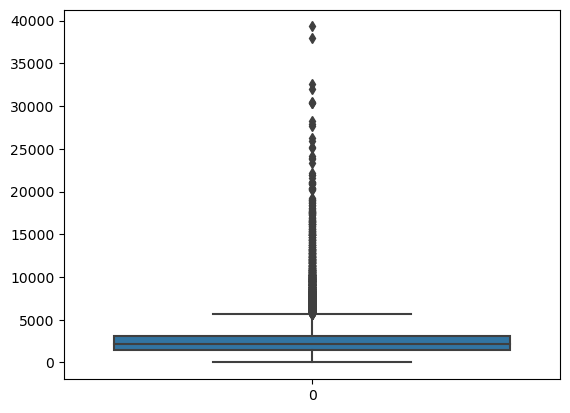

In [18]:
#seeing the outliers for total_rooms
sb.boxplot(calihouse['total_rooms'])

In [19]:
#outlier treatment for variable median_income
calihouse.total_rooms.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10      941.00
0.25     1447.75
0.50     2127.00
0.70     2876.00
0.90     4651.50
0.95     6213.20
0.99    11212.11
Name: total_rooms, dtype: float64

In [20]:
#seeing limits
total_rooms_HE=calihouse[calihouse.total_rooms > 7000].copy()
total_rooms_HE

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.22,37.86,21,7099,1106.0,2401,1138,3.46775,NEAR BAY,358500
283,-122.16,37.79,22,12842,2048.0,4985,1967,5.98490,NEAR BAY,371000
508,-122.30,37.84,14,7355,2408.0,3100,2051,4.00180,NEAR BAY,143800
568,-122.24,37.73,21,7031,1249.0,2930,1235,4.52130,NEAR BAY,228400
570,-122.24,37.72,5,18634,2885.0,7427,2718,7.61100,NEAR BAY,350700
...,...,...,...,...,...,...,...,...,...,...
20530,-121.76,38.57,11,15018,3008.0,7984,2962,3.13710,INLAND,201800
20539,-121.71,38.56,20,8627,1516.0,4071,1466,4.21980,INLAND,164100
20544,-121.76,38.55,23,8800,1857.0,6330,1832,2.06500,INLAND,219400
20563,-121.75,38.67,9,12139,2640.0,6837,2358,3.12500,INLAND,132500


In [21]:
#putting them at one place
print(len(total_rooms_HE))

741


In [22]:
#removing outliers
for x in calihouse.total_rooms:
    if x > 7000:
        calihouse.total_rooms.replace(x,np.nan,inplace=True)

<AxesSubplot: >

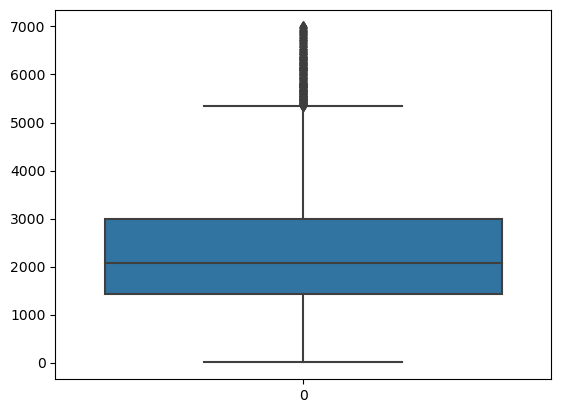

In [23]:
#checking if outliers gone 
sb.boxplot(calihouse.total_rooms)

In [24]:
#replacing nan values with median 
med_tr=calihouse.total_rooms.median()
med_tr
calihouse.total_rooms.replace(np.nan,med_tr, inplace=True)

<AxesSubplot: >

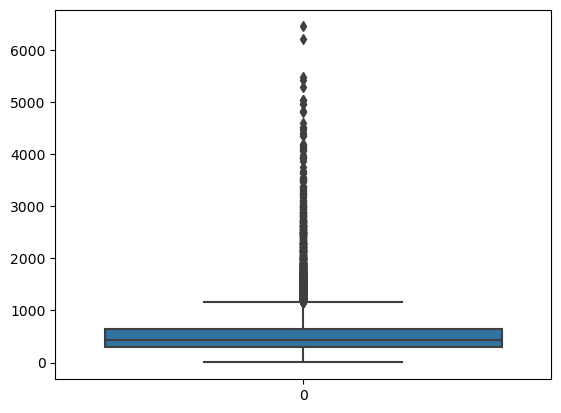

In [25]:
#seeing the outliers for total_bedrooms
sb.boxplot(calihouse['total_bedrooms'])

In [26]:
#outlier treatment for variable median_income
calihouse.total_bedrooms.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10     199.00
0.25     297.00
0.50     435.00
0.70     588.00
0.90     959.10
0.95    1271.00
0.99    2216.27
Name: total_bedrooms, dtype: float64

In [27]:
#seeing limits
total_bedrooms_HE=calihouse[calihouse.total_bedrooms > 1300].copy()
total_bedrooms_HE

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
95,-122.26,37.80,36,5329.0,2477.0,3469,2323,2.0096,NEAR BAY,130000
96,-122.26,37.82,31,4596.0,1331.0,2048,1180,2.8345,NEAR BAY,183800
100,-122.25,37.81,29,4656.0,1414.0,2304,1250,2.4912,NEAR BAY,257800
101,-122.25,37.81,28,5806.0,1603.0,2563,1497,3.2177,NEAR BAY,273400
104,-122.26,37.81,34,5871.0,1914.0,2689,1789,2.8406,NEAR BAY,335700
...,...,...,...,...,...,...,...,...,...,...
20539,-121.71,38.56,20,2074.0,1516.0,4071,1466,4.2198,INLAND,164100
20543,-121.74,38.55,33,6861.0,1820.0,3717,1767,1.7311,INLAND,182600
20544,-121.76,38.55,23,2074.0,1857.0,6330,1832,2.0650,INLAND,219400
20563,-121.75,38.67,9,2074.0,2640.0,6837,2358,3.1250,INLAND,132500


In [28]:
#removing outliers
for x in calihouse.total_bedrooms:
    if x > 1271:
        calihouse.total_bedrooms.replace(x,np.nan,inplace=True)


<AxesSubplot: >

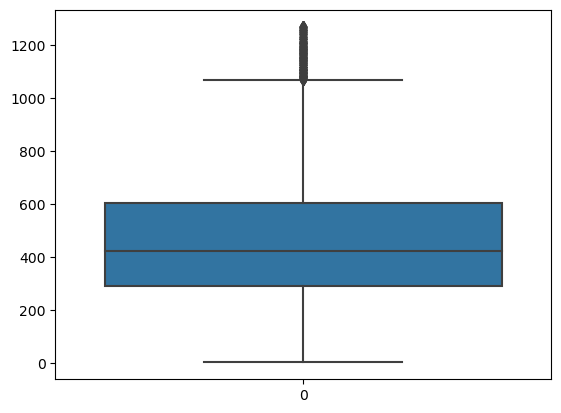

In [29]:
#checking if outliers gone 
sb.boxplot(calihouse.total_bedrooms)

In [30]:
#replacing nan values with median 
med_tb=calihouse.total_bedrooms.median()
med_tb
calihouse.total_bedrooms.replace(np.nan,med_tb, inplace=True)

<AxesSubplot: >

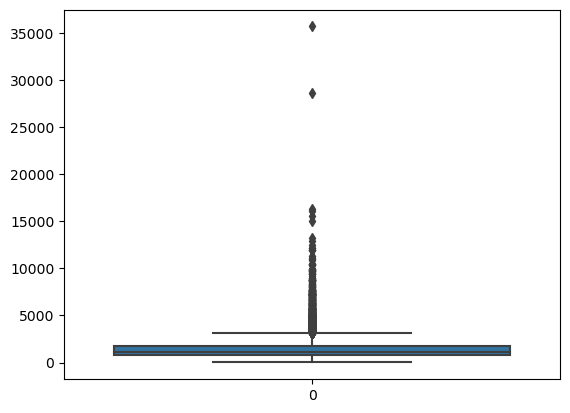

In [31]:
#seeing the outliers for population
sb.boxplot(calihouse['population'])

In [32]:
#outlier treatment for population
calihouse.population.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10     510.00
0.25     787.00
0.50    1166.00
0.70    1580.00
0.90    2566.00
0.95    3288.00
0.99    5805.83
Name: population, dtype: float64

In [33]:
#seeing limits
population_HE=calihouse[calihouse.population > 3000].copy()
population_HE

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
95,-122.26,37.80,36,5329.0,423.0,3469,2323,2.0096,NEAR BAY,130000
185,-122.23,37.79,43,5963.0,423.0,4367,1231,2.1917,NEAR BAY,112800
283,-122.16,37.79,22,2074.0,423.0,4985,1967,5.9849,NEAR BAY,371000
460,-122.26,37.87,52,1087.0,371.0,3337,350,1.4012,NEAR BAY,175000
485,-122.26,37.86,35,5161.0,423.0,3276,1742,1.6307,NEAR BAY,253600
...,...,...,...,...,...,...,...,...,...,...
20544,-121.76,38.55,23,2074.0,423.0,6330,1832,2.0650,INLAND,219400
20563,-121.75,38.67,9,2074.0,423.0,6837,2358,3.1250,INLAND,132500
20567,-121.79,38.66,15,6809.0,1052.0,3060,1060,5.3064,INLAND,165000
20604,-121.54,39.12,17,4251.0,899.0,3265,934,2.3496,INLAND,65000


In [34]:
#removing outliers
for x in calihouse.population:
    if x > 3000:
        calihouse.population.replace(x,np.nan,inplace=True)


<AxesSubplot: >

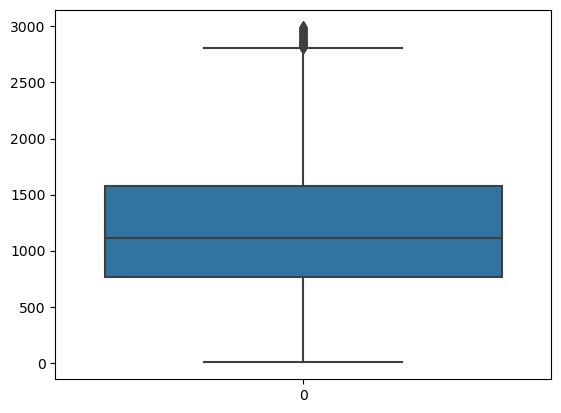

In [35]:
#checking if outliers gone 
sb.boxplot(calihouse.population)

In [36]:
#replacing nan values with median 
med_pop=calihouse.population.median()
med_pop
calihouse.population.replace(np.nan,med_pop, inplace=True)

<AxesSubplot: >

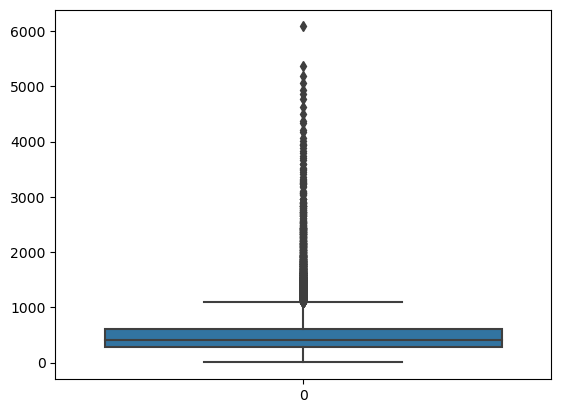

In [37]:
#seeing the outliers for households
sb.boxplot(calihouse['households'])

In [38]:
#outlier treatment for households
calihouse.households.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10     184.00
0.25     280.00
0.50     409.00
0.70     553.00
0.90     890.00
0.95    1162.00
0.99    1982.66
Name: households, dtype: float64

In [39]:
#seeing limits
households_HE=calihouse[calihouse.households > 1160].copy()
households_HE

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
95,-122.26,37.80,36,5329.0,423.0,1114.0,2323,2.0096,NEAR BAY,130000
96,-122.26,37.82,31,4596.0,423.0,2048.0,1180,2.8345,NEAR BAY,183800
98,-122.26,37.82,22,3682.0,1270.0,2024.0,1250,1.2185,NEAR BAY,170000
100,-122.25,37.81,29,4656.0,423.0,2304.0,1250,2.4912,NEAR BAY,257800
101,-122.25,37.81,28,5806.0,423.0,2563.0,1497,3.2177,NEAR BAY,273400
...,...,...,...,...,...,...,...,...,...,...
20539,-121.71,38.56,20,2074.0,423.0,1114.0,1466,4.2198,INLAND,164100
20543,-121.74,38.55,33,6861.0,423.0,1114.0,1767,1.7311,INLAND,182600
20544,-121.76,38.55,23,2074.0,423.0,1114.0,1832,2.0650,INLAND,219400
20563,-121.75,38.67,9,2074.0,423.0,1114.0,2358,3.1250,INLAND,132500


In [40]:
#removing outliers
for x in calihouse.households:
    if x > 1160:
        calihouse.households.replace(x,np.nan,inplace=True)


<AxesSubplot: >

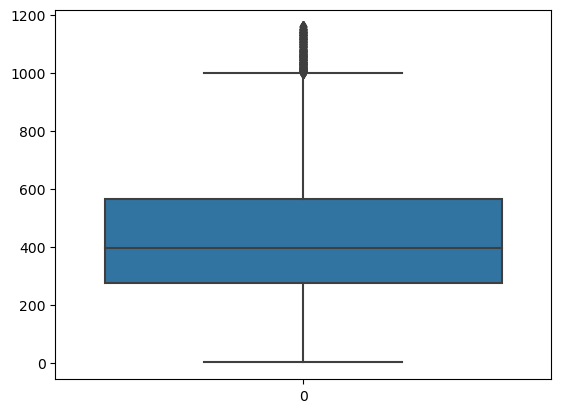

In [41]:
#checking if outliers gone 
sb.boxplot(calihouse.households)

In [42]:
#replacing nan values with median 
med_hs=calihouse.households.median()
med_hs
calihouse.households.replace(np.nan,med_hs, inplace=True)

<AxesSubplot: >

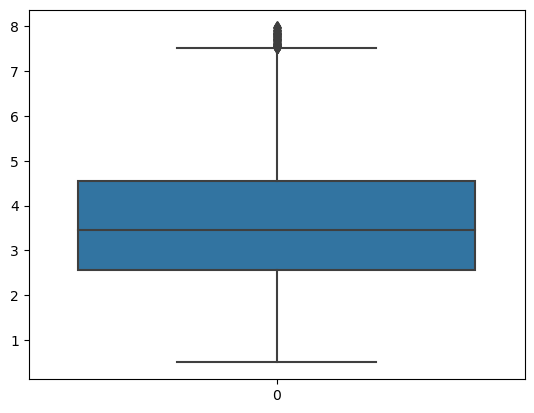

In [43]:
#seeing the outliers for median_income
sb.boxplot(calihouse['median_income'])

**Step 3:Exploratory data analysis**

In this step, we are going to explore the dataset. Perform hypothesis tests,bivariate analysis and check for correlation between variables.

In [44]:
#summary stats
calihouse.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2327.04,465.00,1204.83,434.30,3.65,206855.82
std,2.00,2.14,12.59,1295.43,242.65,601.62,224.54,1.46,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,297.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2074.00,423.00,1114.00,395.00,3.47,179700.00
75%,-118.01,37.71,37.00,2948.00,588.00,1539.00,552.00,4.54,264725.00
max,-114.31,41.95,52.00,7000.00,1271.00,2999.00,1159.00,8.00,500001.00


In [45]:
#seeing correlation of numerical variables
cordata =calihouse[non_cat].corr()
cordata.round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.11,0.01,0.04,0.10,0.04,-0.01,-0.05
latitude,-0.92,1.00,0.01,-0.02,-0.05,-0.12,-0.07,-0.08,-0.14
housing_median_age,-0.11,0.01,1.00,-0.30,-0.24,-0.21,-0.22,-0.16,0.11
total_rooms,0.01,-0.02,-0.30,1.00,0.79,0.69,0.78,0.22,0.16
total_bedrooms,0.04,-0.05,-0.24,0.79,1.00,0.72,0.94,-0.01,0.05
population,0.10,-0.12,-0.21,0.69,0.72,1.00,0.77,0.01,-0.03
households,0.04,-0.07,-0.22,0.78,0.94,0.77,1.00,0.03,0.07
median_income,-0.01,-0.08,-0.16,0.22,-0.01,0.01,0.03,1.00,0.55
median_house_value,-0.05,-0.14,0.11,0.16,0.05,-0.03,0.07,0.55,1.00


<AxesSubplot: >

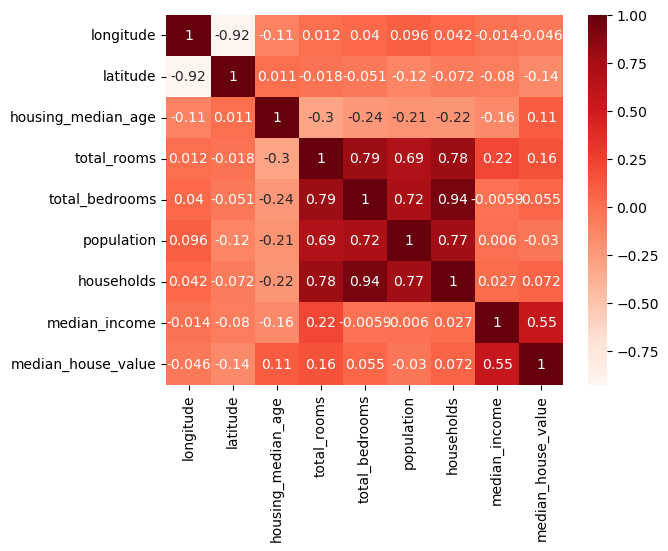

In [46]:
#heatmap of correlation
sb.heatmap(cordata, annot=True, cmap="Reds")

In [47]:
#creating bins
bins = np.linspace(min(calihouse["median_house_value"]), max(calihouse["median_house_value"]), 6)
bins
group_names = ['Low','mid-low', 'Medium','mid-high', 'High']
calihouse["Price-levels"] = pd.cut(calihouse["median_house_value"], bins, labels=group_names, include_lowest=True )
calihouse[['median_house_value','Price-levels']].head(20)

,median_house_value,Price-levels
0,452600,High
1,358500,mid-high
2,352100,mid-high
3,341300,mid-high
4,342200,mid-high
5,269700,Medium
6,299200,Medium
7,241400,Medium
8,226700,Medium
9,261100,Medium


In [48]:
#price distribution
price_count=calihouse["Price-levels"].value_counts()
print(price_count)

mid-low     7870
Medium      4568
Low         4489
mid-high    1991
High        1722
Name: Price-levels, dtype: int64


Text(0.5, 1.0, 'Distribution of houses among price levels')

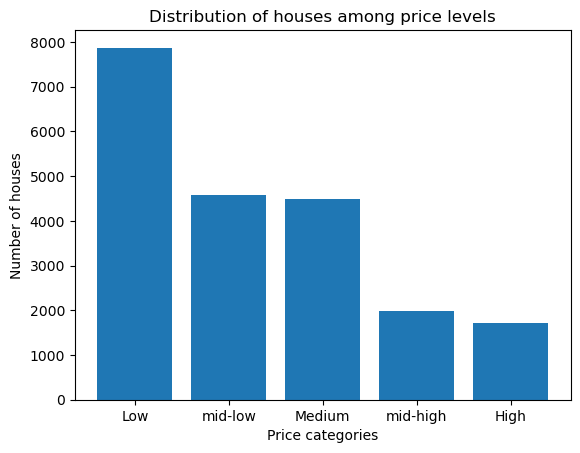

In [49]:
# Distribution visualized
plt.bar(group_names, calihouse["Price-levels"].value_counts())
plt.xlabel("Price categories")
plt.ylabel("Number of houses")
plt.title("Distribution of houses among price levels")

<AxesSubplot: xlabel='ocean_proximity', ylabel='median_house_value'>

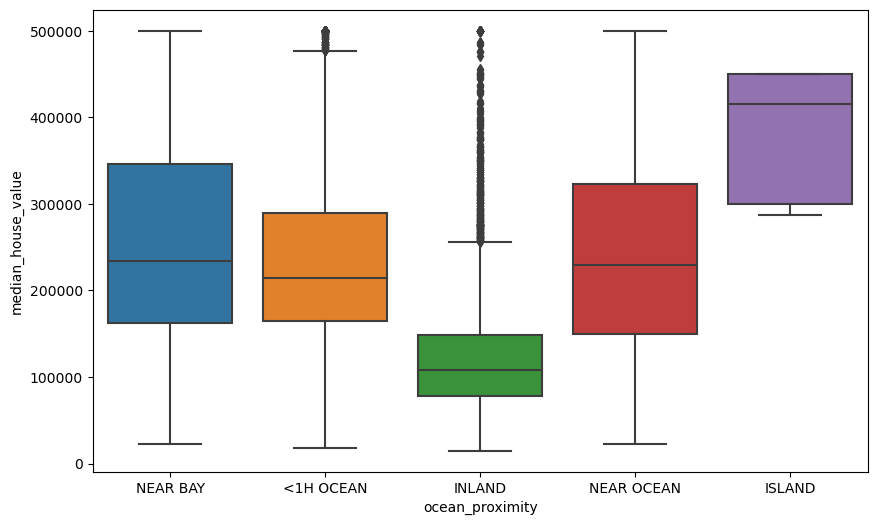

In [50]:
#season vs cnt 
plt.figure(figsize=[10,6])
sb.boxplot(data=calihouse, x="ocean_proximity", y="median_house_value")


In [51]:
#checking if median_house_value differs according to the ocean_proximity
mod = ols("median_house_value ~ ocean_proximity", data = calihouse).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
ocean_proximity,4.0,6.543716e+13,1.635929e+13,1612.140736,0.0
Residual,20635.0,2.093948e+14,1.014756e+10,NaN,NaN


In [52]:
# ocean_proximity and Price level wise House Prices
calihouse.pivot_table(values='median_house_value',
                 index='ocean_proximity',
                 columns='Price-levels', fill_value=0, aggfunc='mean')

Price-levels,Low,mid-low,Medium,mid-high,High
ocean_proximity,,,,,
<1H OCEAN,94918.148148,165836.743819,248872.897871,347369.021739,477171.634385
INLAND,78860.092048,145918.912338,243755.748373,346043.200000,466212.161765
ISLAND,0.000000,0.000000,293750.000000,0.000000,438233.333333
NEAR BAY,91258.666667,163722.993197,251072.805508,350705.597964,474792.117978
NEAR OCEAN,88303.436426,157838.319908,254732.403718,350494.308943,476042.053191


**FINDINGS**


1.Most of the houses are in the low price range and can be afforded by most people. 

2.The price of the house is having moderate strong correlation with Median income implying people with high income buy high priced house.

3.The prices in Inland are affordable to most people while houses on islands are costliest.



**Step 4: Model building**

A linear regression model is going to be built in order to predict the rating of the app which is the dependent variable. The categorical variables will be converted into numerical using dummy variables method.
We will use a decision tree regressor as well as Random Forest Regression.
The model with highest R2 will be used and least RMSE. 
The algorithm will predict the rating of an application.

In [53]:
calihouse.head(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,Price-levels


In [54]:
#initalizing encoder
label_encoder=preproc.LabelEncoder()

In [55]:
#encoding categorical variables
openc=label_encoder.fit_transform(calihouse['ocean_proximity'])
plenc=label_encoder.fit_transform(calihouse['Price-levels'])

In [56]:
#replacing original with encoded variables
calihouse['ocean_proximity']=openc
calihouse['Price-levels']=plenc

In [57]:
#examining the changes
calihouse.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,Price-levels
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,3.46775,3,452600,0
1,-122.22,37.86,21,2074.0,1106.0,2401.0,1138.0,3.46775,3,358500,3
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.25740,3,352100,3
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.64310,3,341300,3
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.84620,3,342200,3


**First Model: Multiple Linear Regression**

The first  model will be of multiple linear regression with all variables irrespective of their correlation status.

In [58]:
#setting values of x and y
X= calihouse.drop(['median_house_value'], axis=1)
y= calihouse.pop('median_house_value')

In [59]:
# Create linear regression object
regressor = LinearRegression()

In [60]:
# Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state= 1000000000)


In [61]:
# Fit model to training data
regressor.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-2, normalize=False)

LinearRegression(n_jobs=-2, normalize=False)

In [62]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)
y_pred

array([193265.11743911, 304412.06261694,  19487.16102179, ...,
       261581.45679766, 141576.91946566, 140947.39632408])

In [63]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.5435975479459457


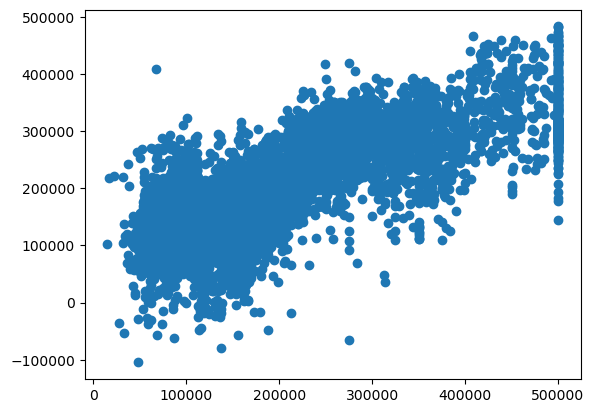

In [64]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

<AxesSubplot: xlabel='median_house_value', ylabel='Density'>

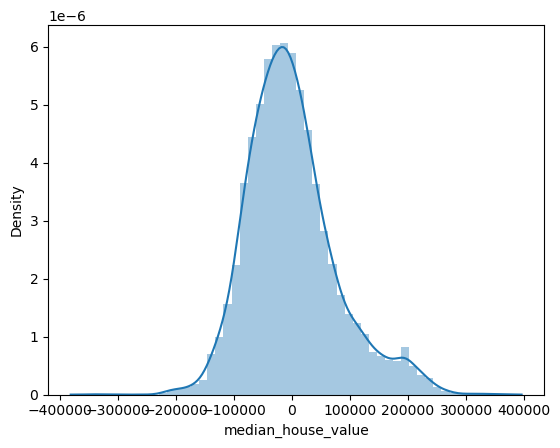

In [65]:
# Histogram of the distribution of residuals
sb.distplot((y_test - y_pred))

In [66]:
#coefficients 
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
longitude,-55639.377019
latitude,-56449.335945
housing_median_age,836.593479
total_rooms,10.866017
total_bedrooms,62.169765
population,-36.303946
households,-4.316753
median_income,35711.802309
ocean_proximity,-1254.531837
Price-levels,-23380.422887


**Conclusion**

The model is not very good as it can explain only 54% of the change in the dependent variable. The fit is not achieved properly. The variables are not enough and maybe another methodology needs to be used to develop this model.

Every one unit increase in:

longitude is associated with a decrease in Price by $55639.

latitude is associated with a decrease in Price by $56449.

housing_median_age is associated with an increase in Price by $836

total_bedrooms is associated with an increase in Price by a negligible amount.

total_rooms is associated with an increase in Price by a negligible amount.

population is associated with a decrease in Price by a negligible amount.

households is associated with a decrease in Price by a negligible amount.

median_income is associated an increase in Price by $35711.


**Second  Model: Linear regression**

The second model will be of linear regression with one variable that is the median income which has a moderate to strong positive effect on the dependent variable that is the price of the house. This implies that those who buy highly priced house are having a higher income. 

In [87]:
#setting values of x and y
X= pd.DataFrame(calihouse['median_income'])
y= y 

In [88]:
# Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state= 10)

In [89]:
# create linear regression object
reg = linear_model.LinearRegression()

In [90]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [91]:
#regressor predict
y_pred = reg.predict(X_test)

In [95]:
#prediction on test set
y_test_pred= reg.predict(X_test)
r2_score(y_test, y_test_pred).round(2)

0.31

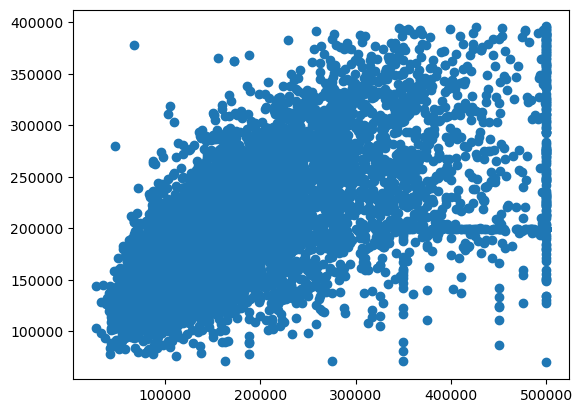

In [96]:
# Actual v predictions scatter
plt.scatter(y_test,y_test_pred)

<AxesSubplot: xlabel='median_house_value', ylabel='Density'>

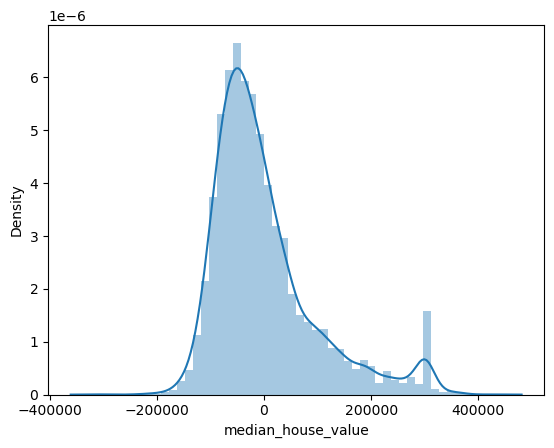

In [97]:
# Histogram of the distribution of residuals
sb.distplot((y_test - y_test_pred))

In [99]:
#coefficients 
cdf = pd.DataFrame(data = reg.coef_, index = X_train.columns, columns = ['Coefficients'])
cdf

,Coefficients
median_income,43467.457203


In [100]:
#The RMSE 
mse = mean_squared_error(y_test,y_test_pred)
print('The mean square error of sale and predicted value is: ', mse)

The mean square error of sale and predicted value is:  9375657770.34632


**Conclusion**

The model is not very good as it can explain only 31% of the change in the dependent variable. The fit is not achieved properly. The variables are not enough and maybe another methodology needs to be used to develop this model.

For a unit increase in:
Median income the price of the house increases by around 43,500 dollars.

**Third Model: Decision Tree regression**

The third  model will be of Decision Tree regression with all variables. 

In [101]:
#setting values of x and y
X= X
y= y 

In [102]:
# Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state= 10)

In [103]:
# create a regressor object
dtreg = DecisionTreeRegressor(random_state = 0) 
  

In [104]:
# fit the regressor with X and Y data
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [105]:
#regressor predict
y_pred = dtreg.predict(X_test)

In [106]:
#prediction on test set
y_test_pred= dtreg.predict(X_test)
r2_score(y_test, y_test_pred).round(2)

0.15

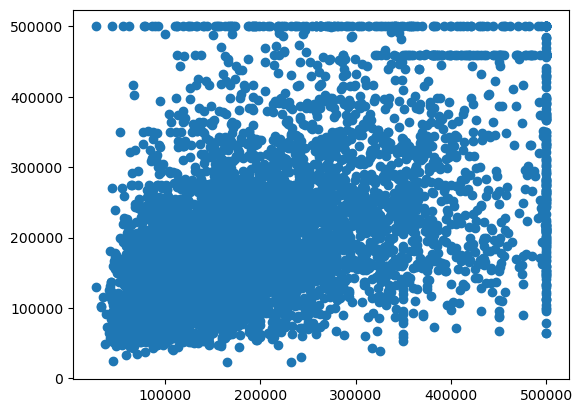

In [107]:
# Actual v predictions scatter
plt.scatter(y_test,y_test_pred)

<AxesSubplot: xlabel='median_house_value', ylabel='Density'>

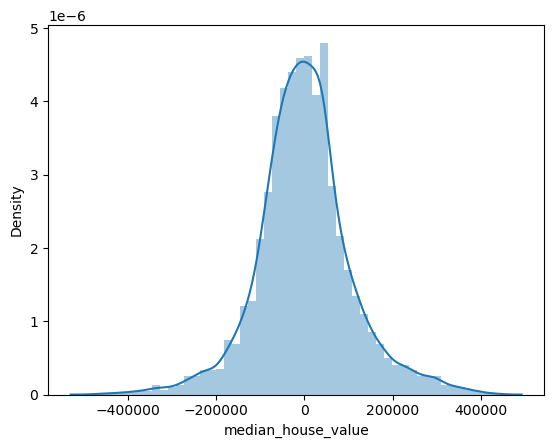

In [108]:
# Histogram of the distribution of residuals
sb.distplot((y_test - y_test_pred))

**Conclusion**


This model performs very poorly and is able to explain only 15% of the changes taking place in the dependent variable. 


**Fourth Model: Random Forest Regression**

The Fourth model will be of Random Forest Regression with all variables.

In [112]:
#setting up random forest regressor
rfreg = RandomForestRegressor(n_estimators = 100, random_state = 0)
 

In [113]:
# fit the regressor with x and y data
rfreg.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [114]:
#regressor predict
y_pred = rfreg.predict(X_test)

In [115]:
#prediction on test set
y_test_pred= rfreg.predict(X_test)
r2_score(y_test, y_test_pred).round(2)

0.32

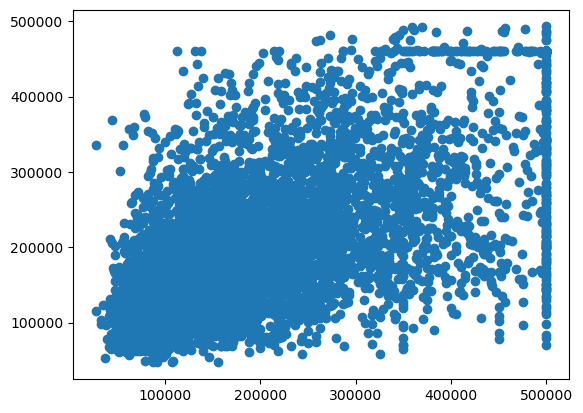

In [116]:
# Actual v predictions scatter
plt.scatter(y_test,y_test_pred)

<AxesSubplot: xlabel='median_house_value', ylabel='Density'>

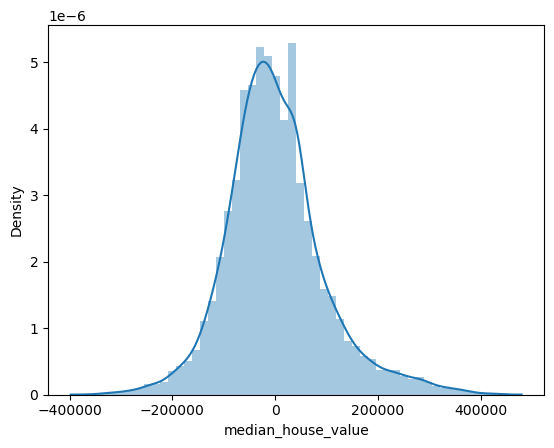

In [117]:
# Histogram of the distribution of residuals
sb.distplot((y_test - y_test_pred))

## **Conclusion**

This model performs very poorly and is able to explain only 32% of the changes taking place in the dependent variable. But however this is almost 2 times better than a single decision tree. 
